<a href="https://colab.research.google.com/github/daianeklein/dnc/blob/main/Telemarketing_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT SCORE CLASSIFICATION

***

## Prevendo os usuários com alta chance de deixar seu produto

### Problema de Negócio
Você trabalha em uma plataforma de telemarketing e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas.

Eles acreditam que é possível prever se um usuário tem mais chance de deixar o produto antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não.

Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

***

## Índice


1.   Packages Importing
2.   Data Importing
3.   Data Exploration
4.   Data Cleaning and Imputation
5.   Feature Selection
6.   Data Prepartion
7.   Machine Learning Models

## Packages Importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report




## Data Importing

In [3]:
#importing df
df = pd.read_csv('Telecom_Churn.xls')

In [4]:
# linhas e colunas
df.shape

(7043, 21)

In [5]:
# top 5 linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Exploration

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Tratando Nulos**

Dealing with Null Values:
https://www.kaggle.com/code/hamdallak/dealing-with-null-values

## Data Visualization

In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

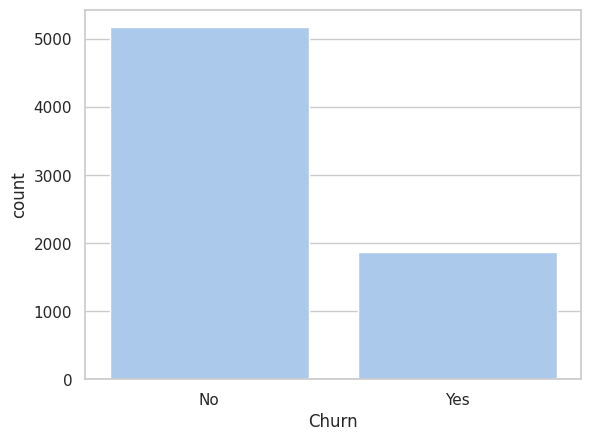

In [11]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.countplot(x='Churn', data=df)

In [12]:
for column in df.columns:
  print(df[column].value_counts())
  print('\n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

In [13]:
# tratando empty string
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
# tratando empty string
df = df[df['TotalCharges'] != ' ']

#tipo de dado atual
print(df['TotalCharges'].dtype)

#mudando para float
df['TotalCharges'] = df['TotalCharges'].astype('float64')
print(df['TotalCharges'].dtype)

object
float64


<ipython-input-14-67144a393b8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float64')


# Assumptions

#### 1. Seniors tendem a não cancelar o plano

In [15]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [16]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

<ipython-input-16-975e5ff420e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


In [17]:
#percentage
contingency_table_norm = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')
contingency_table_percent = contingency_table_norm * 100
contingency_table_norm

Churn,No,Yes
SeniorCitizen,,
No,0.763497,0.236503
Yes,0.583187,0.416813


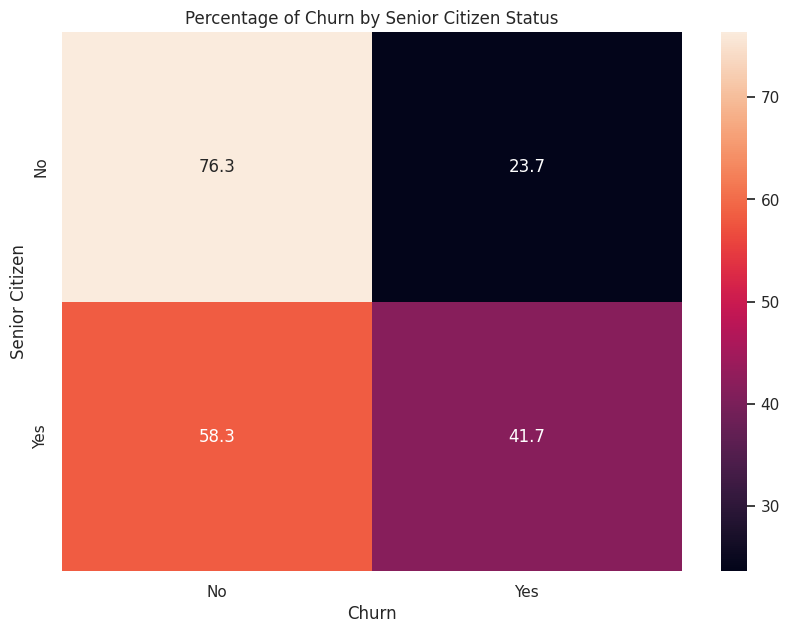

In [18]:
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table_percent, annot=True, fmt=".1f")
plt.title('Percentage of Churn by Senior Citizen Status')
plt.xlabel('Churn')
plt.ylabel('Senior Citizen')
plt.show()

### 2. Dependents == No tendem a cancelar o plano

In [19]:
dependentes_df = df.groupby('Dependents')['Churn'].value_counts(normalize=True).reset_index()
dependentes_df['proportion'] = round(dependentes_df['proportion'] * 100, 0)

dependentes_df

,Dependents,Churn,proportion
0,No,No,69.0
1,No,Yes,31.0
2,Yes,No,84.0
3,Yes,Yes,16.0


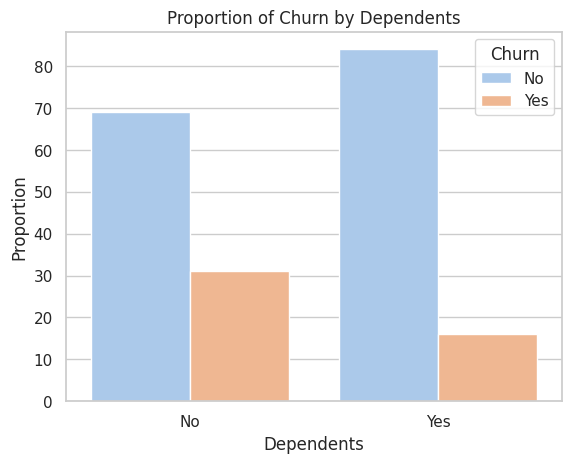

In [20]:
bar_plot = sns.barplot(data=dependentes_df, x='Dependents', y='proportion', hue='Churn')
plt.title('Proportion of Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Proportion');




### 3. Os serviços adicionais colaboram para Churn ou Não Churn?

In [21]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']

df[cols]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,Yes,No,No,No,No,No
1,Yes,No,Yes,No,No,No,No
2,Yes,Yes,No,No,No,No,Yes
3,Yes,No,Yes,Yes,No,No,No
4,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...
7038,Yes,No,Yes,Yes,Yes,Yes,No
7039,No,Yes,Yes,No,Yes,Yes,No
7040,Yes,No,No,No,No,No,No
7041,No,No,No,No,No,No,Yes


In [22]:
churn = df.query("Churn == 'Yes'")
no_churn = df.query("Churn == 'No'")

In [23]:
df.groupby('Churn')['OnlineSecurity'].value_counts(normalize=True).reset_index()

,Churn,OnlineSecurity,proportion
0,No,No,0.394344
1,No,Yes,0.333140
2,No,No internet service,0.272516
3,Yes,No,0.781701
4,Yes,Yes,0.157838
5,Yes,No internet service,0.060460


<Axes: xlabel='Churn', ylabel='proportion'>

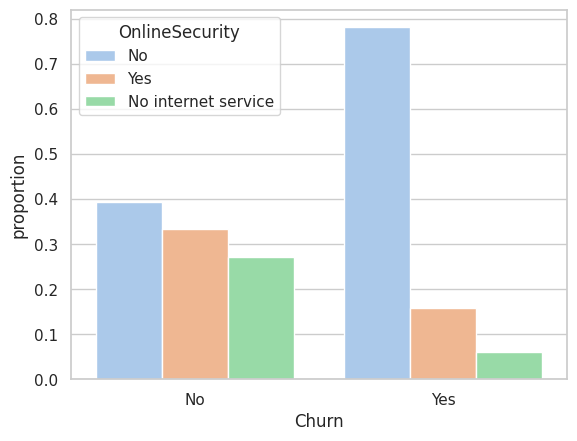

In [24]:
ax = df.groupby('Churn')['OnlineSecurity'].value_counts(normalize=True).reset_index()

sns.barplot(x='Churn', y='proportion', hue='OnlineSecurity', data=ax)

In [25]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']

df[cols]

OnlineBackup = df.groupby('Churn')['OnlineBackup'].value_counts(normalize=True).reset_index()
StreamingTV = df.groupby('Churn')['StreamingTV'].value_counts(normalize=True).reset_index()
StreamingMovies = df.groupby('Churn')['StreamingMovies'].value_counts(normalize=True).reset_index()

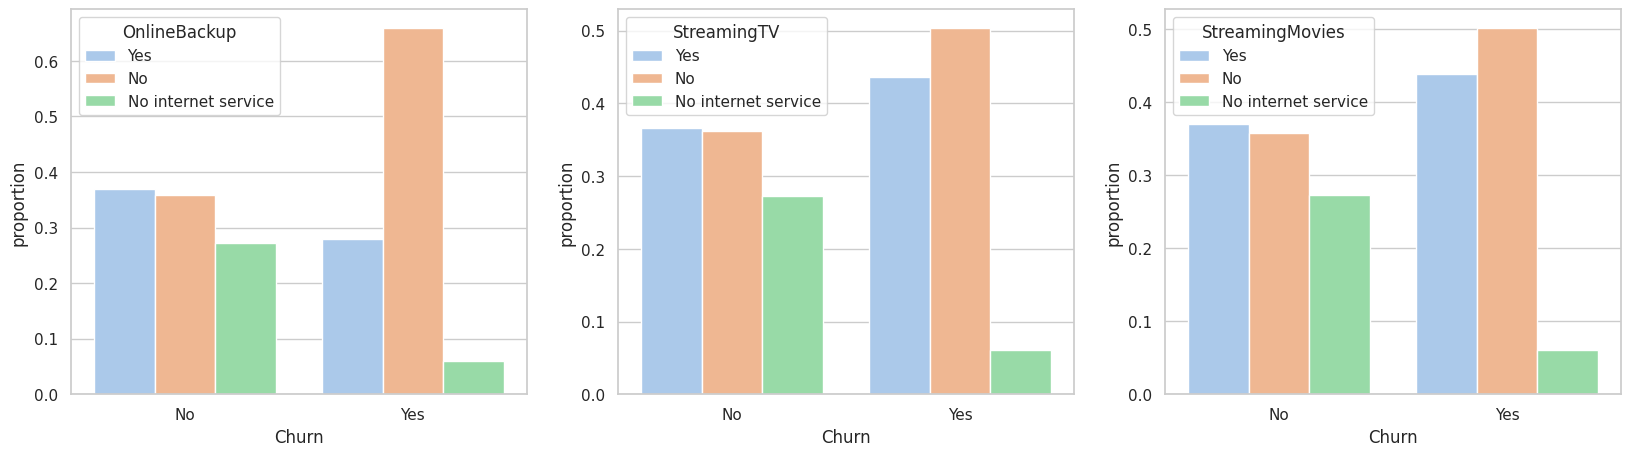

In [26]:
plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
sns.barplot(x='Churn', y='proportion', hue='OnlineBackup', data=OnlineBackup);


plt.subplot(1, 3, 2)
sns.barplot(x='Churn', y='proportion', hue='StreamingTV', data=StreamingTV);

plt.subplot(1, 3, 3)
sns.barplot(x='Churn', y='proportion', hue='StreamingMovies', data=StreamingMovies);


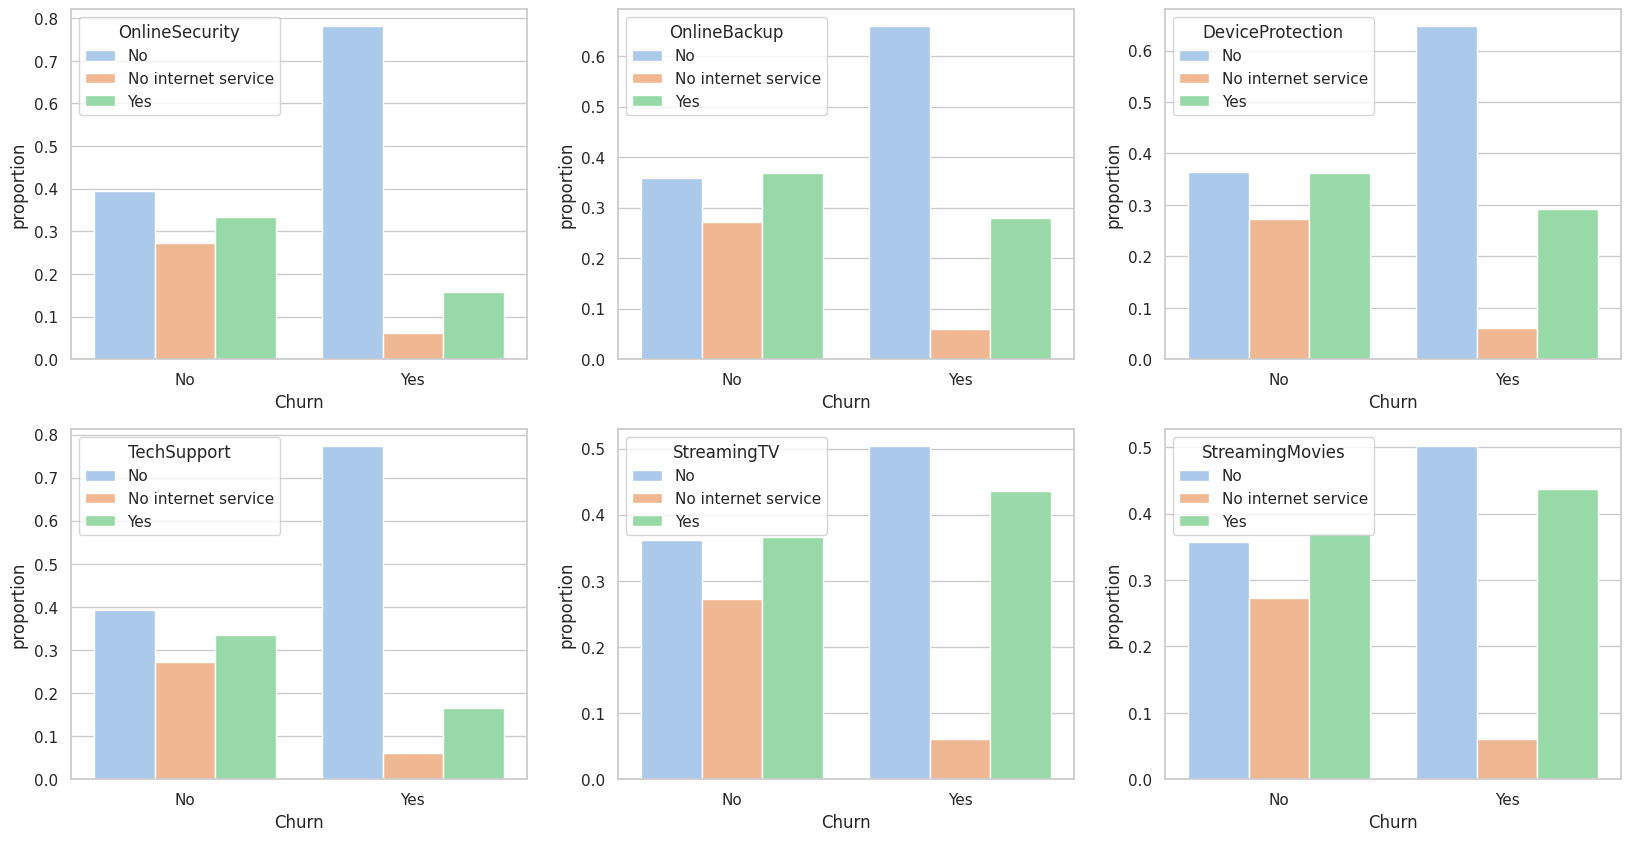

In [27]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 10))

x = 1
for col in cols:
  df_grouped = df.groupby('Churn')[col].value_counts(normalize=True).reset_index()
  df_grouped = df_grouped.sort_values(by=col)

  plt.subplot(2, 3, x)
  sns.barplot(x='Churn', y='proportion', hue=col, data=df_grouped)
  x += 1



In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Feature Selection and Engineering

A seleção de características é o processo de escolher as características mais relevantes e informativas de um conjunto de dados para melhorar a precisão e a eficiência dos modelos de machine learning, reduzindo a dimensionalidade e eliminando características irrelevantes ou redundantes.

In [29]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

mask = (df[cols] == 'Yes').all(axis=1)

# Use the mask to assign new column values
df['servico_incluido'] = mask.astype(int)
df['servico_incluido'].value_counts()


servico_incluido
0    6748
1     284
Name: count, dtype: int64

In [30]:
df[df['servico_incluido'] == 1][cols].head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
15,Yes,Yes,Yes,Yes,Yes,Yes
28,Yes,Yes,Yes,Yes,Yes,Yes
140,Yes,Yes,Yes,Yes,Yes,Yes
153,Yes,Yes,Yes,Yes,Yes,Yes
167,Yes,Yes,Yes,Yes,Yes,Yes


In [31]:
df[df['servico_incluido'] == 0][cols].head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Yes,No,No,No,No
1,Yes,No,Yes,No,No,No
2,Yes,Yes,No,No,No,No
3,Yes,No,Yes,Yes,No,No
4,No,No,No,No,No,No


In [32]:
#removendo cols
df = df.drop(columns=cols)
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'servico_incluido'],
      dtype='object')

In [33]:
#selecionando colunas
df = df[['customerID', 'SeniorCitizen', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'servico_incluido']]


**📝 Feature Selection - Outros Métodos**

1. Métodos de Filtro: Avaliam características com base em propriedades estatísticas como correlação ou variância.

2. Análise de Componentes Principais (PCA): Reduz a dimensionalidade transformando características em um espaço dimensional menor.

3. Importância de Características de Árvores: Modelos como Árvores de Decisão fornecem pontuações de importância de características.

4. Seleção de Características Univariadas: Seleciona características com base em testes estatísticos univariados.

## Data Preparation

Normalização é o processo de ajustar os valores das características para uma escala comum.

Encoding é a conversão de variáveis categóricas em uma forma numérica para que possam ser usadas em algoritmos de machine learning.

In [34]:
num_attributes = df.select_dtypes(exclude=['object'])
cat_attributes = df.select_dtypes(include=['object'])

In [35]:
num_attributes.describe()

,tenure,MonthlyCharges,TotalCharges,servico_incluido
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.040387
std,24.545260,30.085974,2266.771362,0.196879
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [36]:
rs = RobustScaler()

df['tenure'] = rs.fit_transform(df[['tenure']].values)
df['MonthlyCharges'] = rs.fit_transform(df[['MonthlyCharges']].values)
df['TotalCharges'] = rs.fit_transform(df[['TotalCharges']].values)

In [37]:
num_attributes_rs = df.select_dtypes(exclude=['object'])
num_attributes_rs.describe()

,tenure,MonthlyCharges,TotalCharges,servico_incluido
count,7032.000000,7032.000000,7.032000e+03,7032.000000
mean,0.074387,-0.102290,2.610523e-01,0.040387
std,0.533593,0.554325,6.680163e-01,0.196879
min,-0.608696,-0.959926,-4.062948e-01,0.000000
25%,-0.434783,-0.640488,-2.935280e-01,0.000000
50%,0.000000,0.000000,3.350185e-17,0.000000
75%,0.565217,0.359512,7.064720e-01,0.000000
max,0.934783,0.891755,2.147571e+00,1.000000


In [38]:
#variaveis categorias
label_encoder = LabelEncoder()

for column in ['SeniorCitizen', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']:
    df[column] = label_encoder.fit_transform(df[column])

In [39]:
df[['SeniorCitizen', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']].head()

,SeniorCitizen,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,Contract,PaymentMethod
0,0,0,0,1,1,0,0,2
1,0,0,1,0,0,0,1,3
2,0,0,1,1,0,0,0,3
3,0,0,0,0,1,0,1,0
4,0,0,1,1,0,1,0,2


**📝 Encodings**

Codificação por Rótulos (Label Encoding)

Neste método, cada valor único da categoria é atribuído a um número inteiro. É uma forma muito direta de transformar categorias em números. No entanto, essa técnica pode introduzir uma noção de ordem que pode não existir realmente (por exemplo, simbolizar "Sim" como 1 e "Não" como 0 pode implicar que "Sim" é maior que "Não"). Essa técnica é frequentemente usada para atributos binários, ou seja, aqueles que têm apenas dois valores possíveis.


Exemplos:

* SeniorCitizen: {Não: 0, Sim: 1}
* Dependents: {Não: 0, Sim: 1}
* PhoneService: {Não: 0, Sim: 1}
* PaperlessBilling: {Não: 0, Sim: 1}
* Churn: {Não: 0, Sim: 1}

**Codificação One-Hot (One-Hot Encoding)**

Para cada valor único no atributo, uma nova coluna binária (0 ou 1) é criada. Este método é útil quando não há relação de ordem entre os valores e quando o número de valores categóricos não é muito alto, pois pode aumentar significativamente o tamanho do conjunto de dados. Cada categoria recebe sua própria coluna, e a presença de um valor é marcada com 1, enquanto a ausência é 0.

Exemplos:

* MultipleLines: Cria três colunas: uma para "Não", uma para "Sim" e uma para "Sem serviço telefônico".
* InternetService: Cria três colunas: uma para "Fibra óptica", uma para "DSL" e uma para "Não".
* Contract: Cria três colunas: uma para "Mensal", uma para "Dois anos" e uma para "Um ano".
* PaymentMethod: Cria quatro colunas: uma para "Cheque eletrônico", uma para "Cheque enviado", uma para "Transferência bancária automática" e uma para "Cartão de crédito automático".

Essas técnicas permitem que você transforme dados categóricos em formatos numéricos, adequados para análises estatísticas e modelos de machine learning que requerem entradas numéricas.


**📝 Normalização - Outros Métodos**


1. MinMaxScaler: Redimensiona os valores para um intervalo específico, geralmente entre 0 e 1.

2. StandardScaler: Padroniza os valores para que tenham uma média de 0 e um desvio padrão de 1.

3. Escalonamento personalizado: adapta a transformação dos dados para atender às necessidades específicas do conjunto de dados ou do problema em questão.


In [40]:
df.head()

,customerID,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,servico_incluido
0,7590-VHVEG,0,0,-0.608696,0,1,0,0,1,2,-0.746200,-0.403038,No,0
1,5575-GNVDE,0,0,0.108696,1,0,0,1,0,3,-0.246891,0.145000,No,0
2,3668-QPYBK,0,0,-0.586957,1,0,0,0,1,3,-0.304007,-0.379963,Yes,0
3,7795-CFOCW,0,0,0.347826,0,1,0,1,0,0,-0.516813,0.130633,No,0
4,9237-HQITU,0,0,-0.586957,1,0,1,0,1,2,0.006449,-0.367144,Yes,0


# Machine Learning Models

In [41]:
df = df.drop(columns='customerID', axis=1)

#dependent and independent variables
X = df.drop(columns='Churn',axis=1)
y = df['Churn']


In [42]:
X.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,servico_incluido
0,0,0,-0.608696,0,1,0,0,1,2,-0.746200,-0.403038,0
1,0,0,0.108696,1,0,0,1,0,3,-0.246891,0.145000,0
2,0,0,-0.586957,1,0,0,0,1,3,-0.304007,-0.379963,0
3,0,0,0.347826,0,1,0,1,0,0,-0.516813,0.130633,0
4,0,0,-0.586957,1,0,1,0,1,2,0.006449,-0.367144,0


In [43]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

## Train Test Split

In [44]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

Random Forest Classifier é um algoritmo de aprendizado de máquina que cria
múltiplas árvores de decisão durante o treinamento e combina suas previsões para obter uma classificação dos dados.

Referência: [Random Forest Classifier Tutorial](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial/notebook)

In [45]:
RNF = RandomForestClassifier()

RNF.fit(X_train,y_train)

#predict
y_hat = RNF.predict(X_test)

In [46]:
y_hat

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

### Avaliação do modelo

In [47]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_hat)
conf_matrix_rf

array([[897, 136],
       [194, 180]])

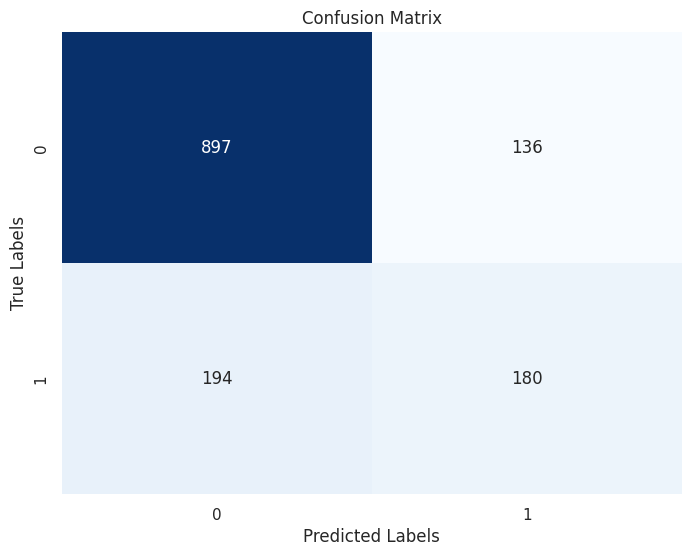

In [48]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Regressão Logística

In [49]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

#predict
y_lr = LR.predict(X_test)

y_lr

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

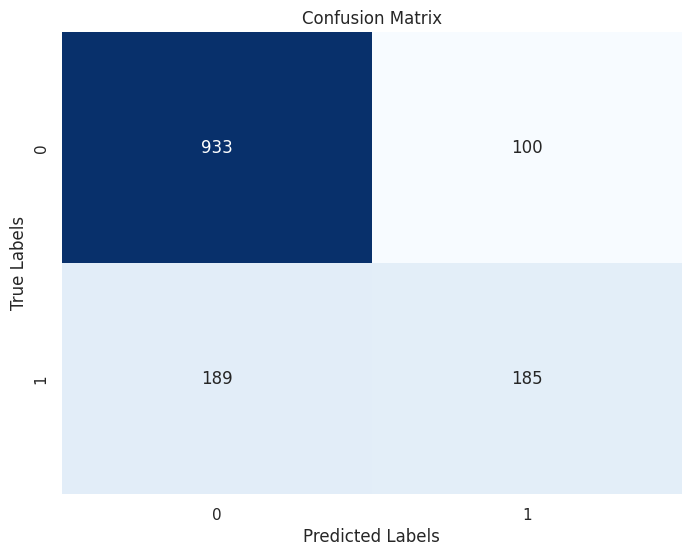

In [50]:
conf_matrix_lr = confusion_matrix(y_test, y_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [54]:
probabilities = LR.predict_proba(X_test)
probabilities #numpy array 0 and 1

array([[0.99509187, 0.00490813],
       [0.85760308, 0.14239692],
       [0.27377588, 0.72622412],
       ...,
       [0.89572535, 0.10427465],
       [0.66964763, 0.33035237],
       [0.99844514, 0.00155486]])

📝 Outros Modelos

1. Redes Neurais Artificiais (ANN)
2. Máquinas de Vetores de Suporte (SVM)
3. K-Nearest Neighbors (KNN)
4. Gradient Boosting Machines (GBM)

## Acurácia

**📝 Acurácia**

A acurácia é uma métrica para avaliar modelos de classificação. Ela é calculada como a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de casos examinados.

Importância: Em modelos de churn, a acurácia ajuda a entender quão bem o modelo está identificando clientes que irão ou não abandonar o serviço.
Técnicas para Melhorar a Acurácia

1. Pré-processamento de Dados

*  Limpeza de Dados: Garantir que os dados não tenham erros ou valores ausentes.
*  Codificação de Variáveis Categóricas: Transformar variáveis categóricas em formatos numéricos usando técnicas como One-Hot Encoding ou Label Encoding.
*  Escalonamento de Variáveis: Normalizar ou padronizar as variáveis numéricas para que não dominem os algoritmos devido à escala.

2. Seleção de Características

*  Análise de Importância: Utilizar técnicas como a importância de características da árvore de decisão para identificar e manter as variáveis mais relevantes.
*  Redução de Dimensionalidade: Aplicar técnicas como PCA (Análise de *
 Componentes Principais) para reduzir o número de variáveis.

3. Otimização de Hiperparâmetros

*  Grid Search: Experimentar diferentes combinações de parâmetros para encontrar a melhor configuração para os modelos.
Random Search: Uma alternativa mais rápida ao Grid Search que não é exaustiva mas pode ser eficiente.

4. Validação Cruzada (Cross Validation)

*  Definição: Técnica para avaliar a generalização de um modelo estatístico. Divide-se os dados em 'k' subconjuntos e o modelo é treinado em 'k-1' desses subconjuntos, com o subconjunto restante usado para testar o modelo. Este processo é repetido 'k' vezes, com cada subconjunto usado exatamente uma vez como dados de teste.

*  Vantagens: Ajuda a mitigar o problema do overfitting e dá uma estimativa mais precisa da capacidade do modelo de se generalizar para novos dados.
Implementação: No scikit-learn, você pode usar KFold para criar 'k' dobras e cross_val_score para avaliar o modelo em cada dobra.